In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("Data/Hands-On-Gradient-Boosting-with-XGBoost-and-Scikit-learn/Chapter07/exoplanets.csv", nrows= 400)

In [3]:
df.head()

,LABEL,FLUX.1,FLUX.2,FLUX.3,FLUX.4,FLUX.5,FLUX.6,FLUX.7,FLUX.8,FLUX.9,...,FLUX.3188,FLUX.3189,FLUX.3190,FLUX.3191,FLUX.3192,FLUX.3193,FLUX.3194,FLUX.3195,FLUX.3196,FLUX.3197
0,2,93.85,83.81,20.10,-26.98,-39.56,-124.71,-135.18,-96.27,-79.89,...,-78.07,-102.15,-102.15,25.13,48.57,92.54,39.32,61.42,5.08,-39.54
1,2,-38.88,-33.83,-58.54,-40.09,-79.31,-72.81,-86.55,-85.33,-83.97,...,-3.28,-32.21,-32.21,-24.89,-4.86,0.76,-11.70,6.46,16.00,19.93
2,2,532.64,535.92,513.73,496.92,456.45,466.00,464.50,486.39,436.56,...,-71.69,13.31,13.31,-29.89,-20.88,5.06,-11.80,-28.91,-70.02,-96.67
3,2,326.52,347.39,302.35,298.13,317.74,312.70,322.33,311.31,312.42,...,5.71,-3.73,-3.73,30.05,20.03,-12.67,-8.77,-17.31,-17.35,13.98
4,2,-1107.21,-1112.59,-1118.95,-1095.10,-1057.55,-1034.48,-998.34,-1022.71,-989.57,...,-594.37,-401.66,-401.66,-357.24,-443.76,-438.54,-399.71,-384.65,-411.79,-510.54


In [4]:
df['LABEL'].value_counts()

1    363
2     37
Name: LABEL, dtype: int64

In [5]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [35]:
X = df.iloc[:,1:]
y = df.iloc[:,0]

In [8]:
def light_plot(index):
    y_vals = X.iloc[index]
    x_vals = np.randomdomdoy_valslslslslpltgengenge(len(y_vals))
    plt.pltgure(figsize = (15,8))
    plt.xlabel("Number of observations")
    plt.ylabel("Light Flux")
    plt.title("Light Plot " + str(index), size = 15)
    plt.plot(x_vals, y_vals)
    plt.show()

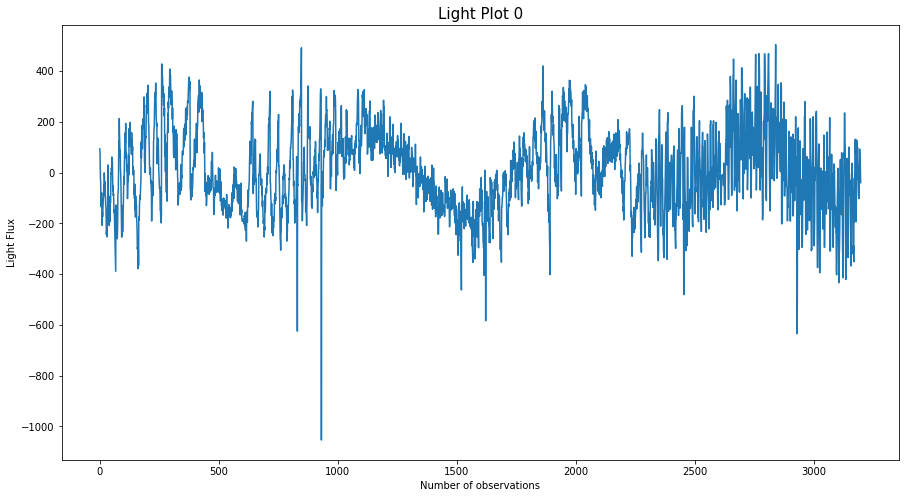

In [9]:
light_plot(0)

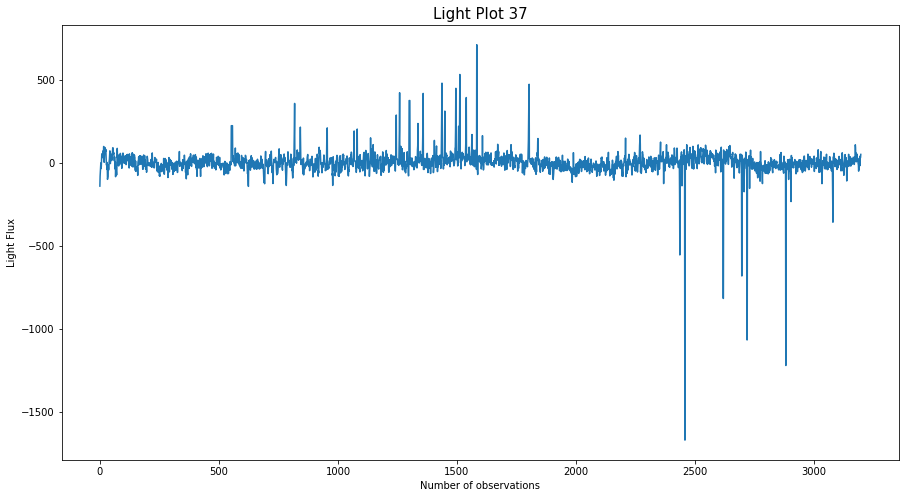

In [10]:
light_plot(37)

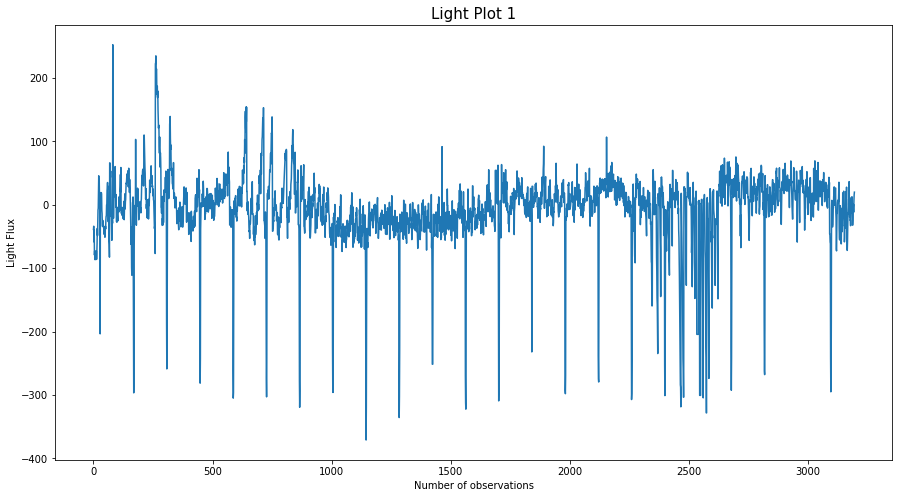

In [11]:
light_plot(1)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Columns: 3198 entries, LABEL to FLUX.3197
dtypes: float64(3197), int64(1)
memory usage: 9.8 MB


In [13]:
df.isnull().sum().sum()

0

In [36]:
y = y - 1

In [14]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

In [37]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state= 2)

In [38]:
model = XGBClassifier(booster = "gbtree", objective = "binary:logistic",
                     random_state = 2)

In [39]:
model.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=2,
              reg_alpha=0, reg_lambda=1, ...)

In [40]:
y_pred = model.predict(X_test)

In [41]:
score = accuracy_score(y_pred, y_test)

In [42]:
print("Accuracy Score : {:.3f}".format(score))

Accuracy Score : 0.890


In [43]:
from sklearn.metrics import confusion_matrix

In [44]:
confusion_matrix(y_true=y_test, y_pred=y_pred)

array([[86,  2],
       [ 9,  3]], dtype=int64)

In [45]:
from sklearn.metrics import classification_report

In [46]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.98      0.94        88
           1       0.60      0.25      0.35        12

    accuracy                           0.89       100
   macro avg       0.75      0.61      0.65       100
weighted avg       0.87      0.89      0.87       100



In [47]:
from sklearn.metrics import recall_score

In [48]:
recall_score(y_test, y_pred)

0.25

In [51]:
def xgb_clf(model, nrows):
    df = pd.read_csv("Data\Hands-On-Gradient-Boosting-with-XGBoost-and-Scikit-learn/Chapter07/exoplanets.csv",
                    nrows= nrows)
    X = df.iloc[:,1:]
    y = df.iloc[:,0]
    y = y - 1
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state= 2)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    score = recall_score(y_test, y_pred)
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    return score

In [52]:
xgb_clf(XGBClassifier(random_state = 2), nrows= 800)

[[189   1]
 [  9   1]]
              precision    recall  f1-score   support

           0       0.95      0.99      0.97       190
           1       0.50      0.10      0.17        10

    accuracy                           0.95       200
   macro avg       0.73      0.55      0.57       200
weighted avg       0.93      0.95      0.93       200



0.1

In [53]:
xgb_clf(XGBClassifier(random_state = 2), nrows= 200)

[[37  0]
 [ 8  5]]
              precision    recall  f1-score   support

           0       0.82      1.00      0.90        37
           1       1.00      0.38      0.56        13

    accuracy                           0.84        50
   macro avg       0.91      0.69      0.73        50
weighted avg       0.87      0.84      0.81        50



0.38461538461538464

In [54]:
xgb_clf(XGBClassifier(random_state = 2), nrows= 74)

[[6 2]
 [5 6]]
              precision    recall  f1-score   support

           0       0.55      0.75      0.63         8
           1       0.75      0.55      0.63        11

    accuracy                           0.63        19
   macro avg       0.65      0.65      0.63        19
weighted avg       0.66      0.63      0.63        19



0.5454545454545454

In [55]:
df_train = pd.merge(y_train, X_train, left_index= True, right_index= True)

In [56]:
y_train.value_counts()

0    275
1     25
Name: LABEL, dtype: int64

In [57]:
new_df = pd.DataFrame(np.repeat(df_train[df_train["LABEL"]==1].values, 9, axis= 0))

In [58]:
new_df.columns = df_train.columns

In [59]:
df_train_resample = pd.concat([df_train, new_df])

In [60]:
df_train_resample['LABEL'].value_counts()

0.0    275
1.0    250
Name: LABEL, dtype: int64

In [61]:
X_train_resample = df_train_resample.iloc[:,1:]
y_train_resample = df_train_resample.iloc[:,0]

In [62]:
model = XGBClassifier(random_state = 2)

In [63]:
model.fit(X_train_resample, y_train_resample)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=2,
              reg_alpha=0, reg_lambda=1, ...)

In [64]:
y_pred = model.predict(X_test)

In [65]:
score = recall_score(y_test, y_pred)

In [66]:
print(confusion_matrix(y_test, y_pred))

[[86  2]
 [ 8  4]]


In [67]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.98      0.95        88
           1       0.67      0.33      0.44        12

    accuracy                           0.90       100
   macro avg       0.79      0.66      0.69       100
weighted avg       0.89      0.90      0.88       100



In [68]:
print(score)

0.3333333333333333


In [70]:
df['LABEL'] = df["LABEL"]-1

In [71]:
df['LABEL'].value_counts()

0    363
1     37
Name: LABEL, dtype: int64

In [72]:
X = df.iloc[:,1:]
y = df.iloc[:,0]

In [73]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state= 2)

In [74]:
model = XGBClassifier(scale_pos_weight = 10, random_state = 2)

In [75]:
model.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=2,
              reg_alpha=0, reg_lambda=1, ...)

In [76]:
y_pred = model.predict(X_test)
print(recall_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.3333333333333333
[[86  2]
 [ 8  4]]
              precision    recall  f1-score   support

           0       0.91      0.98      0.95        88
           1       0.67      0.33      0.44        12

    accuracy                           0.90       100
   macro avg       0.79      0.66      0.69       100
weighted avg       0.89      0.90      0.88       100



In [77]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, StratifiedKFold, cross_val_score

In [78]:
kfold = StratifiedKFold(n_splits= 2, shuffle= True, random_state= 2)

In [79]:
model = XGBClassifier(scale_pos_weight = 10, random_state = 2)

In [80]:
scores = cross_val_score(model, X, y, cv= kfold, scoring= "recall")

In [81]:
print("Recall : ", scores)

Recall :  [0.10526316 0.27777778]


In [82]:
print("Recall Mean : {:.2f}".format(scores.mean()))

Recall Mean : 0.19


In [83]:
def grid_search(params, random = False, X = X, y=y, model = XGBClassifier(random_state = 2)):
    xgb = model
    if random:
        grid = RandomizedSearchCV(xgb, params, cv = kfold, n_jobs= -1, random_state= 2, scoring= "recall")
    else:
        grid = GridSearchCV(xgb, params, cv = kfold, n_jobs= -1, scoring= "recall")
    grid.fit(X, y)
    best_params = grid.best_params_
    print("Best Params : ", best_params)
    best_score = grid.best_score_
    print("Best Score : {:.5f}".format(best_score))

In [84]:
grid_search(params= {"n_estimators":[50,200,400,800]})

Best Params :  {'n_estimators': 50}
Best Score : 0.13596


In [85]:
grid_search(params= {"learning_rate":[0.01, 0.05, 0.2, 0.3]})

Best Params :  {'learning_rate': 0.01}
Best Score : 0.21784


In [86]:
grid_search(params= {"max_depth":[1, 2, 4, 8]})

Best Params :  {'max_depth': 2}
Best Score : 0.13743


In [87]:
grid_search(params= {"subsample":[0.3, 0.5, 0.7, 0.9]})

Best Params :  {'subsample': 0.5}
Best Score : 0.24269


In [88]:
grid_search(params= {'gamma':[0.05, 0.1, 0.5, 1]})

Best Params :  {'gamma': 1}
Best Score : 0.13596


In [89]:
grid_search(params = {"learning_rate" : [0.001, 0.01, 0.03],
                     "max_depth" : [1, 2],
                     "gamma" : [0.025, 0.05, 0.5]})

Best Params :  {'gamma': 0.025, 'learning_rate': 0.001, 'max_depth': 2}
Best Score : 0.27485


In [90]:
grid_search(params = {"max_delta_step" : [1, 3, 5, 7]})

Best Params :  {'max_delta_step': 3}
Best Score : 0.13596


In [91]:
grid_search(params= {"subsample" : [0.3, 0.5, 0.7, 0.9, 1],
                    "colsample_bylevel": [0.3, 0.5, 0.7, 0.9, 1],
                    "colsample_bynode" : [0.3, 0.5, 0.7, 0.9, 1],
                    "colsample_bytree" : [0.3, 0.5, 0.7, 0.9, 1]},
           random= True)

Best Params :  {'subsample': 0.5, 'colsample_bytree': 0.7, 'colsample_bynode': 0.5, 'colsample_bylevel': 1}
Best Score : 0.24561


In [92]:
X_short = X.iloc[:74, :]
y_short = y.iloc[:74]

In [93]:
grid_search(params= {"max_depth" : [1, 2, 3],
                    "colsample_bynode" : [0.5, 0.75, 1]},
           X = X_short, y = y_short, model= XGBClassifier(random_state  = 2))

Best Params :  {'colsample_bynode': 1, 'max_depth': 1}
Best Score : 0.62573


In [98]:
df_all = pd.read_csv("Data/Hands-On-Gradient-Boosting-with-XGBoost-and-Scikit-learn/Chapter07/exoplanets.csv")

In [99]:
df_all["LABEL"] = df_all["LABEL"] - 1

In [100]:
X_all = df_all.iloc[:, 1:]
y_all = df_all.iloc[:, 0]

In [101]:
df_all['LABEL'].value_counts()

0    5050
1      37
Name: LABEL, dtype: int64

In [102]:
weight = int(5050 / 37)

In [103]:
model = XGBClassifier(scale_pos_weight = weight, random_state = 2)

In [104]:
scores = cross_val_score(model, X_all, y_all, cv = kfold, scoring= "recall")

In [105]:
print("Recall : ", scores)

Recall :  [0.10526316 0.        ]


In [106]:
print("Mean Recall : {:.3f}".format(scores.mean()))

Mean Recall : 0.053


In [107]:
grid_search(params= {"learning_rate" : [0.001, 0.01]}, X=X_all, y=y_all,
           model= XGBClassifier(scale_pos_weight = weight, random_state = 2))

Best Params :  {'learning_rate': 0.001}
Best Score : 0.26316


In [108]:
grid_search(params = {"max_depth" : [1, 2],
                     "learning_rate" : [0.001]}, X = X_all, y= y_all,
           model = XGBClassifier(scale_pos_weight = weight, random_state = 2))

Best Params :  {'learning_rate': 0.001, 'max_depth': 2}
Best Score : 0.53509


In [ ]:
def final_model(X, y, model):
    model.fit(X, y)
    y_pred = model.predict(X_test)
    score = recall_score(y_)